In [1]:
import numpy as np
from scipy.stats import t, expon
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from TruncatedNormal import TruncatedNormal
import matplotlib.pyplot as plt
from sampler_newmodel import *
from sampler_gaussian import *


## Estimated Gaussian Distribution Policy and Dataset Information

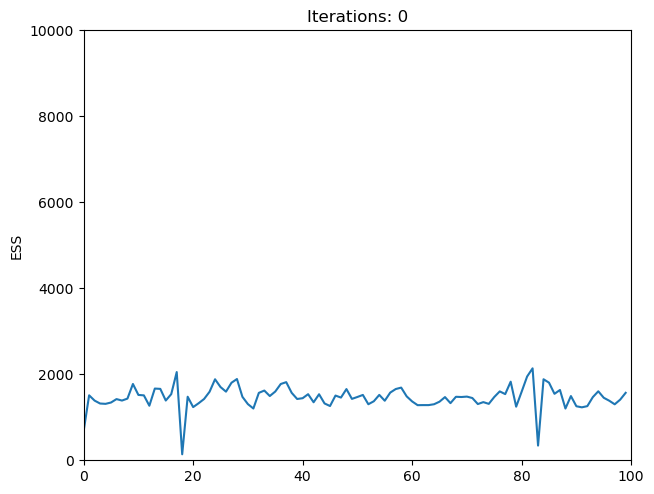

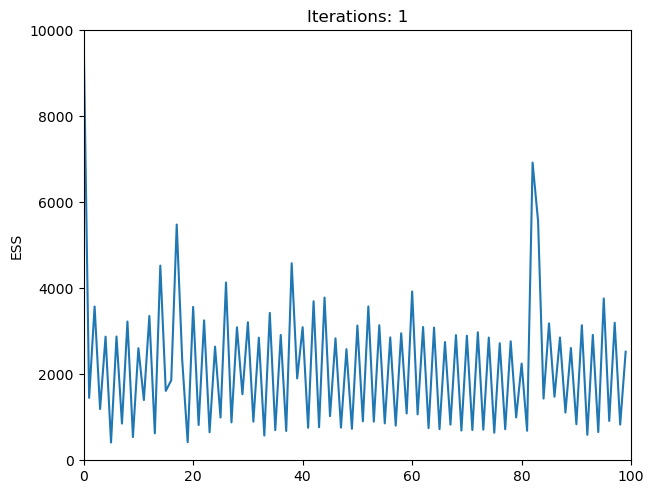

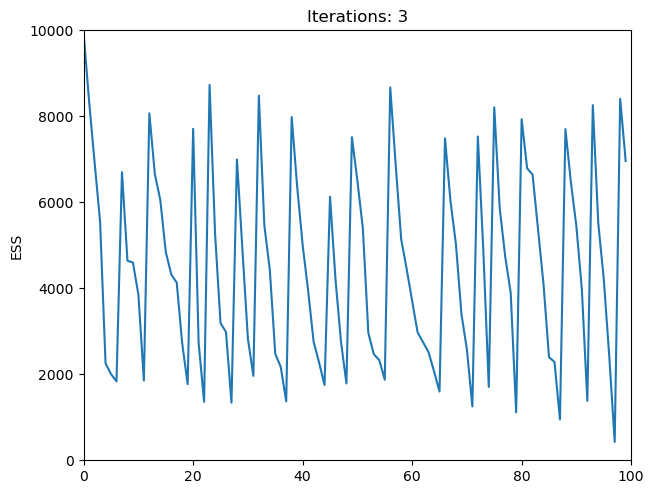

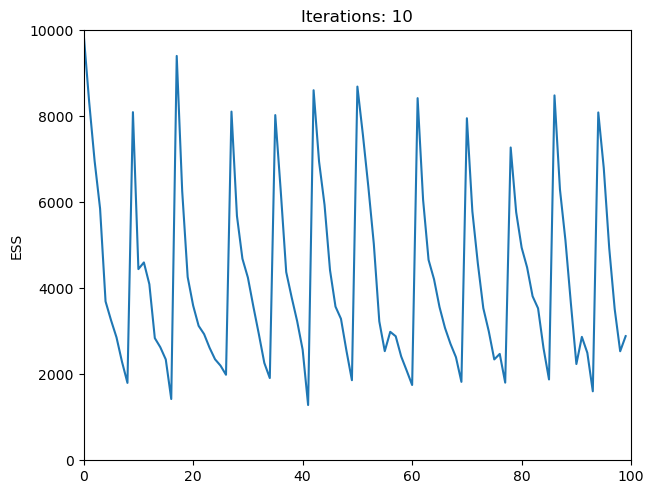

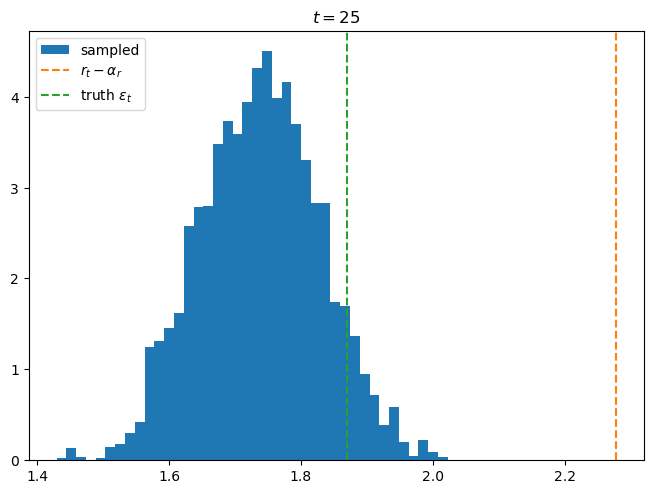

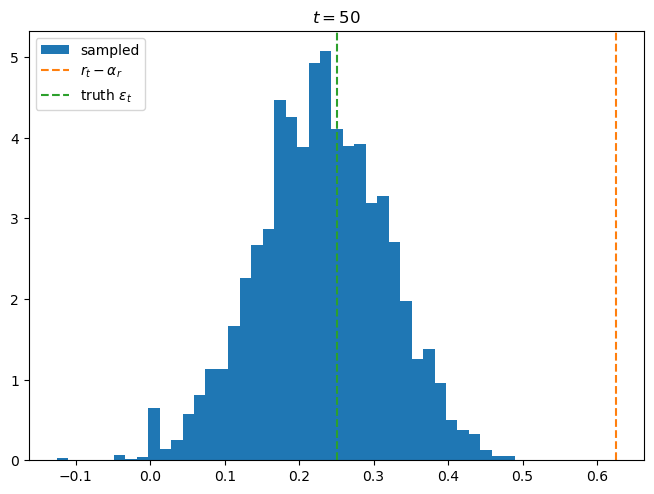

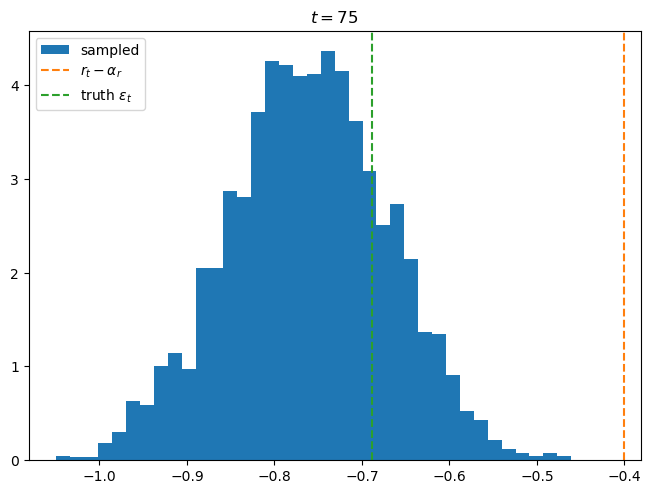

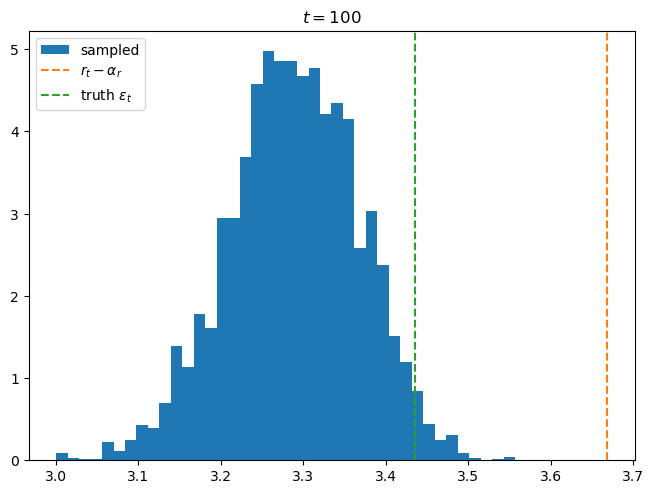

<Figure size 640x480 with 0 Axes>

In [2]:
run_sampler_gaussian()

## Diagnostics of the Sampler

In [2]:
T=100
r=np.load("./data/r.npy")
eps_truth=np.load("./data/eps_truth.npy")
print(r.shape)
beta_r=0.2#0 #0.15 # (0.1263948140321161, .032712088763023284, 6.0, 0.8715676420694289, 0.2913684368439, 0.030264586057052845, 0.008613371294834722, 2.5)
alpha_r=0.2
params= (0.2, 0.2, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
#params= (0.1263948140321161, .032712088763023284, 6.0, 0.8715676420694289, 0.2913684368439, 0.030264586057052845, 0.008613371294834722, 2.5)
#sampler=TEST_SAMPLER(T,params,path='./pth/VIScaler_test1_199.pth',debug=True)


(300, 1)


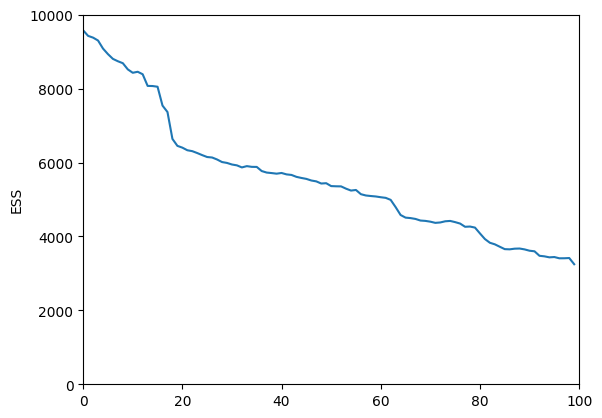

<Figure size 640x480 with 0 Axes>

In [3]:
sampler=TEST_SAMPLER(T,params,path='./tmppth/VIScaler_test1_888.pth')
samples,weights, log_prob=sampler.sample(10000,r,resample_thre=0.2,return_prob=True)
sampler.plot_ESS()

### ESS plot

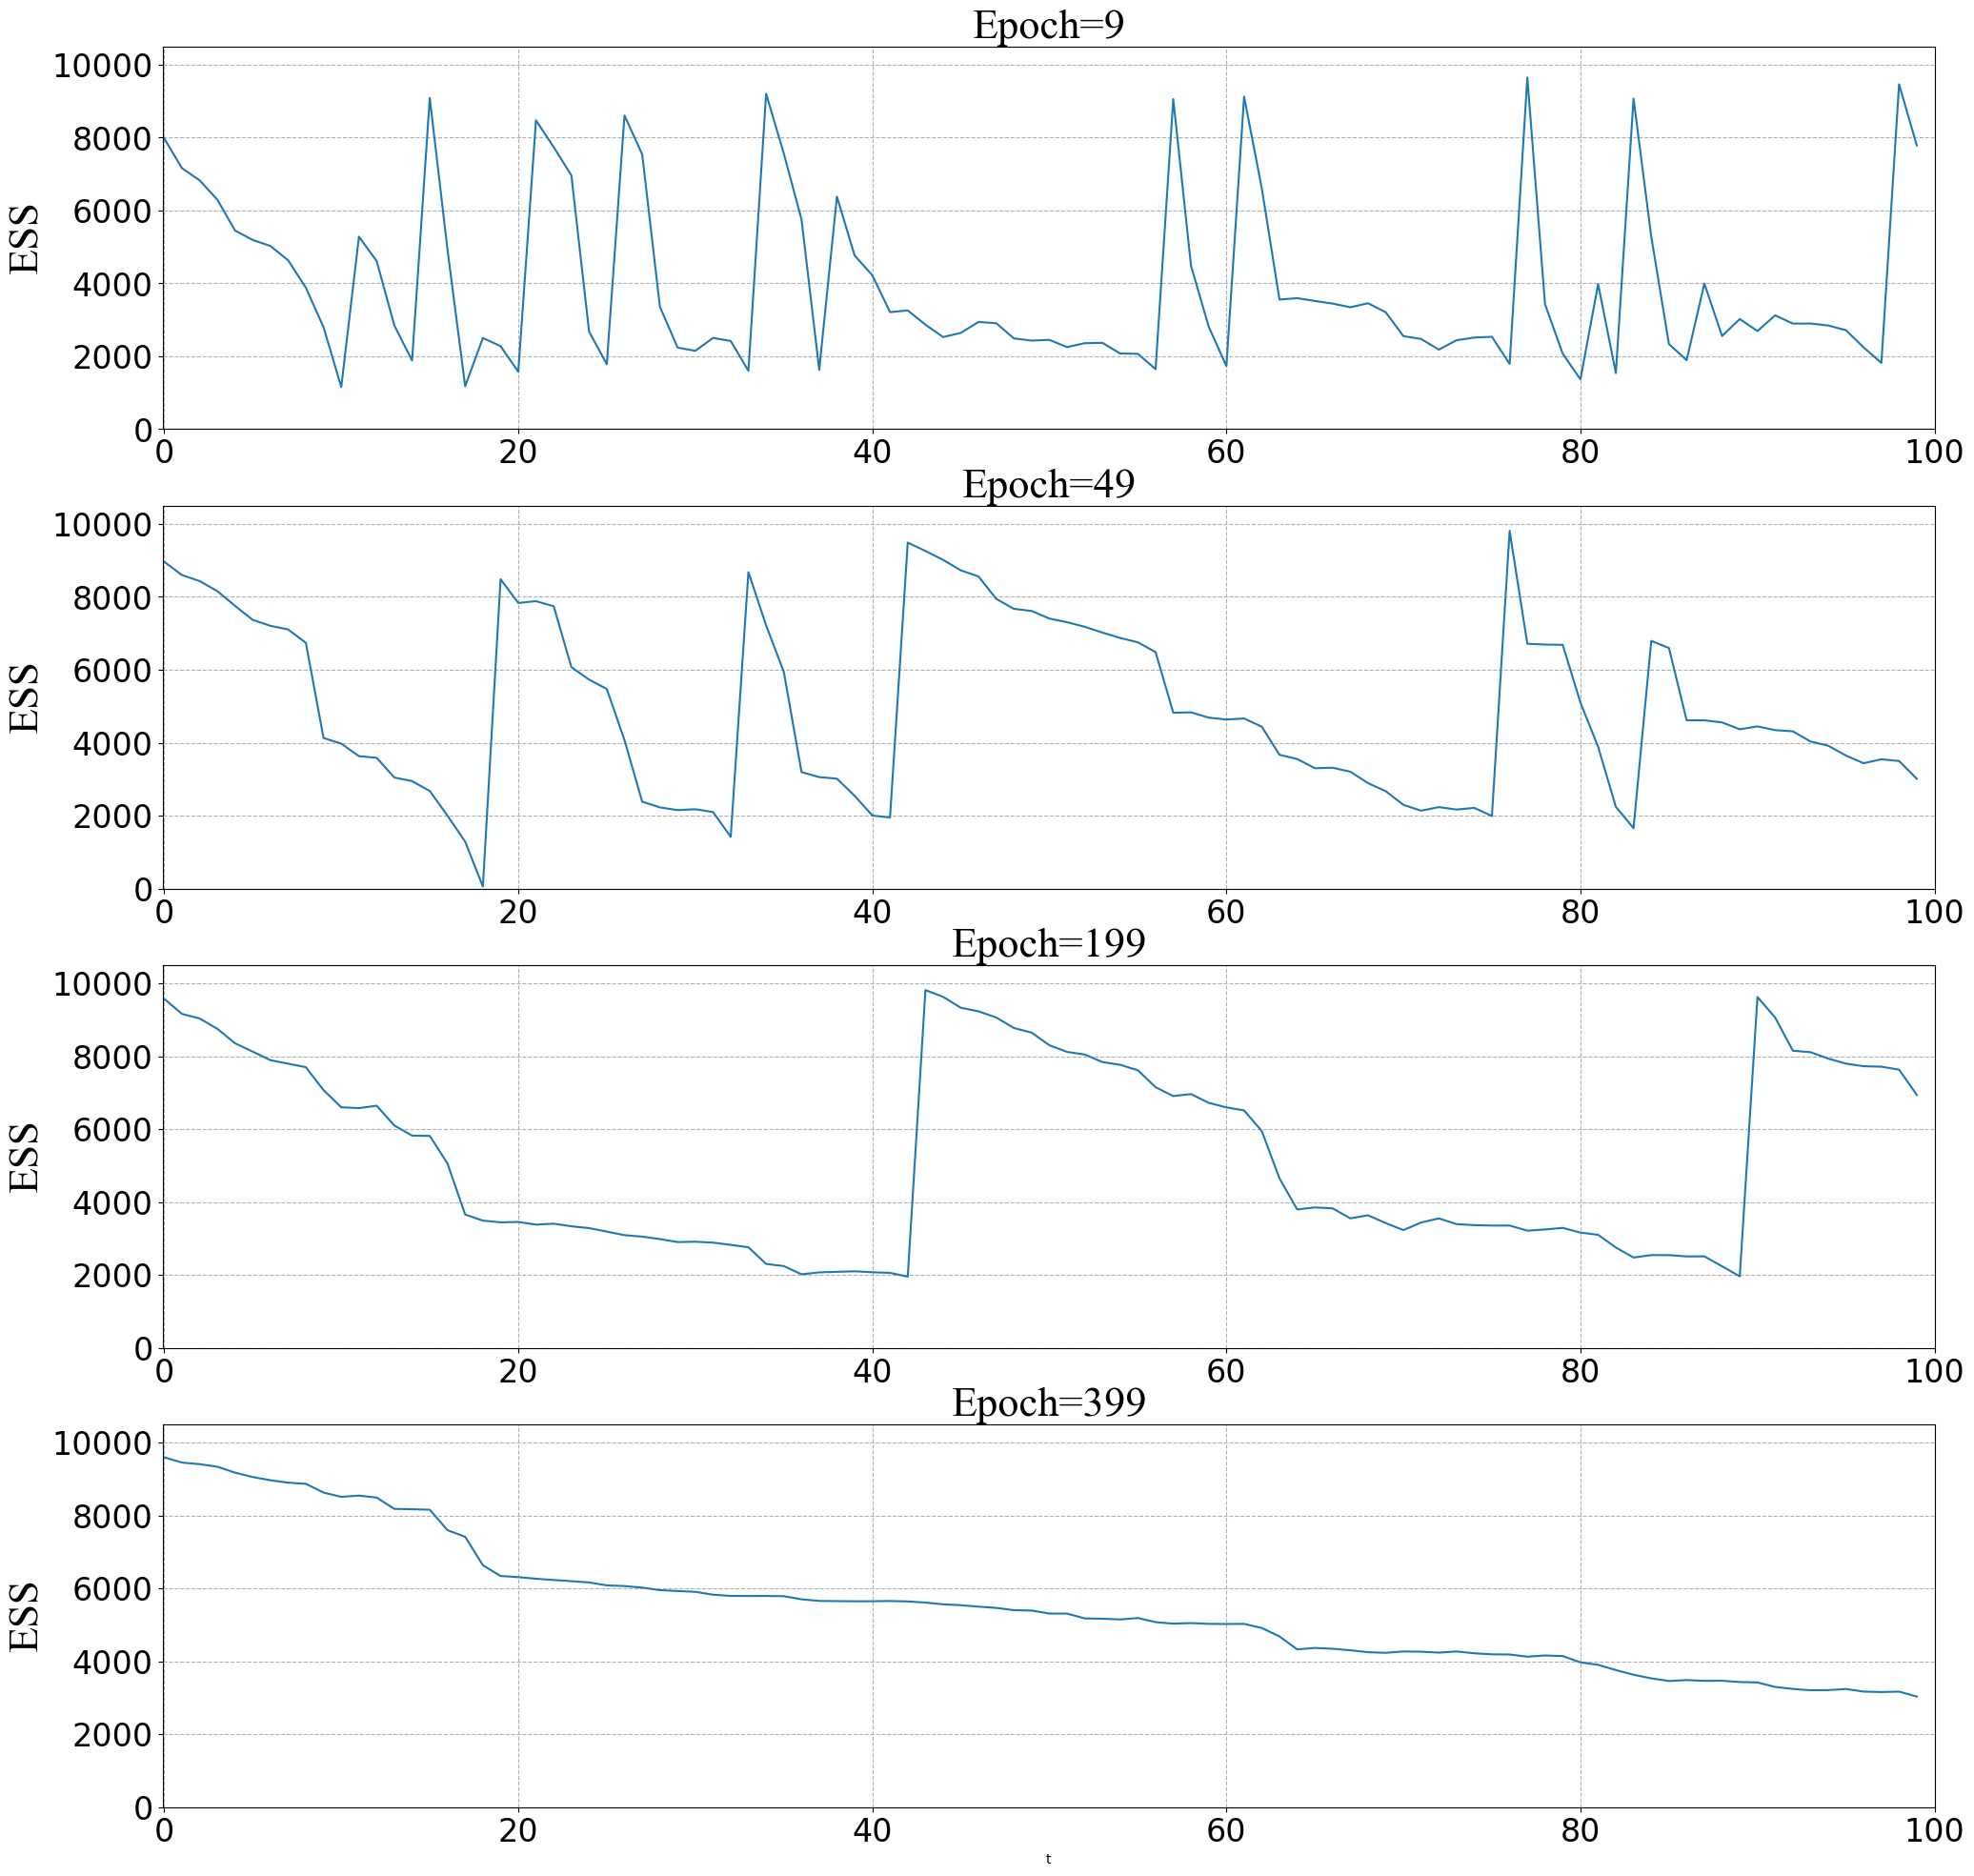

In [8]:

fig, axs = plt.subplots(4, 1, figsize=(24, 24))
timelist=[9, 49, 199, 399]
N=10000
font1={'family' : 'Times New Roman', 'size': 32,"fontstyle":"oblique"}
font2={'family' : 'Times New Roman', 'size': 32}
for i, epoch in enumerate(timelist):
    ax = axs[i]

    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    sampler=TEST_SAMPLER(T,params,path=f'./tmppth_copy/VIScaler_test1_{epoch}.pth',debug=True)
    samples,weights=sampler.sample(N,r,resample_thre=0.2,checklist=[])
    ax.set_title(f"Epoch={epoch}",fontdict=font2)
    if i ==3:
        ax.set_xlabel("t")
    #if i==0 or i==2:
    ax.set_ylabel("ESS",fontdict=font2)
    ax.set_yticks([0,0.2*N,0.4*N,0.6*N,0.8*N,N])
    ax.set_xlim(-0.1,sampler.T)
    ax.set_ylim(0,N+500)
    ax.plot(range(sampler.T),sampler.ESS_list)
    ax.grid(linestyle="--")

/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:261: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs=param_to_input(torch.tensor(rr),torch.tensor(eps_past),torch.tensor(r_past),torch.tensor(self.alpha_r),torch.tensor(self.beta_r),
/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:266: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.tensor(eps_past).shape[0]==outputs.shape[0]


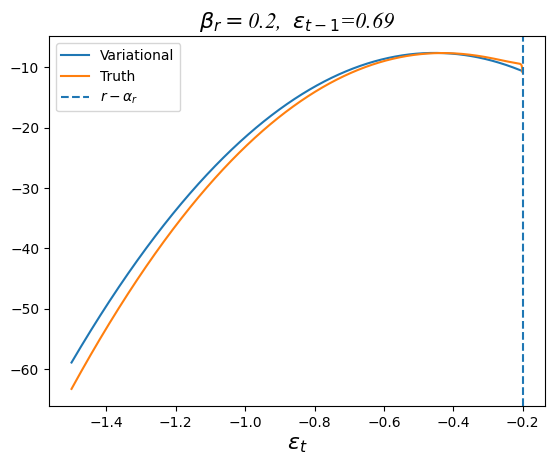

In [29]:
N=10000
r_past=1
r=0
font1={'family' : 'Times New Roman', 'size': 16,"fontstyle":"oblique"}
font2={'family' : 'Times New Roman', 'size': 16}
eps=torch.linspace(-1.5,r-alpha_r-0.001,N)
eps_past=r_past-alpha_r-1e-2-0.1*torch.ones_like(eps)#torch.rand_like(eps)
log_prob=sampler.log_policy_density(eps=eps,eps_past=eps_past,rr=r,r_past=r_past)
log_prob_truth=sampler.log_likelihood_update(epsilon=eps.detach().numpy(),r=r,epsilon_past=eps_past.detach().numpy(),r_past=r_past)

log_prob=log_prob.detach().numpy()

log_prob-=np.log(np.sum(np.exp(log_prob)))
log_prob_truth-=np.log(np.sum(np.exp(log_prob_truth)))
plt.plot(eps,log_prob,label="Variational")
plt.plot(eps,log_prob_truth,label='Truth')
plt.title(r"$\beta_r=$"+f"{str(beta_r)},"+ r"  $\epsilon_{t-1}$"+f"={str(round(eps_past[0].item(),2))}",fontdict=font1)
plt.axvline(x=r-alpha_r,ls="--",label=r"$r-\alpha_r$")
plt.legend()
plt.xlabel(r"$\epsilon_t$",fontdict=font2)
plt.savefig("./report_figs/desnitycomp.pdf")

### Histogram of the last entry

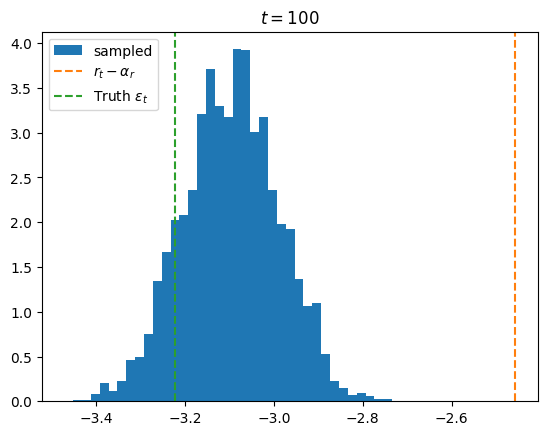

In [4]:
i=99
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
plt.hist((samples[:,i])[index], density=True, bins=40, label="sampled")
plt.axvline(x=r[i]-alpha_r,ls="--",c="C1",label=r"$r_t-\alpha_r$")
plt.axvline(x=eps_truth[i],ls="--",c="C2",label=r"Truth $\epsilon_t$")
plt.title(f"$t={i+1}$")
plt.legend()
plt.show()


### Unique values

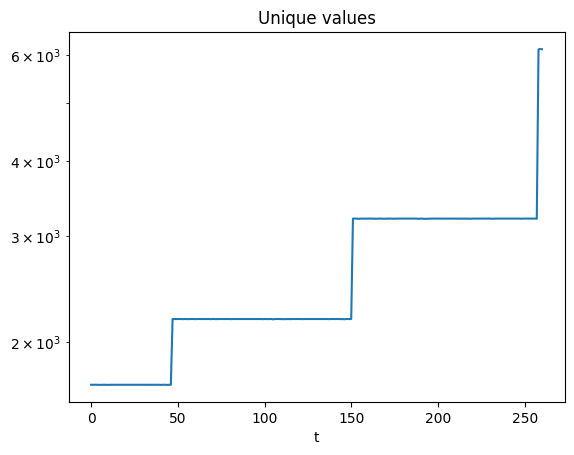

In [151]:
plt.figure()
unique_val=[]
for t in range(T):
    unique_val.append(np.unique(samples[:,t][index]).shape[0])

# plt.show()
#print(unique_val)
plt.plot(unique_val)
plt.title("Unique values")
plt.xlabel("t")
plt.yscale("log")
plt.show()

Check if the variational distribution matches the truth posterior distirbution

/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:261: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs=param_to_input(torch.tensor(rr),torch.tensor(eps_past),torch.tensor(r_past),torch.tensor(self.alpha_r),torch.tensor(self.beta_r),
/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:266: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.tensor(eps_past).shape[0]==outputs.shape[0]


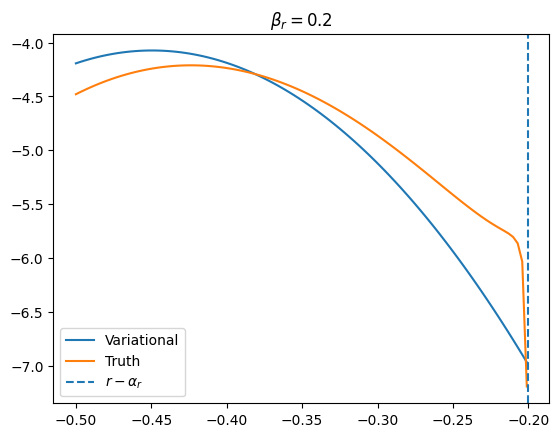

In [9]:
N=100
r_past=0
r=0
eps=torch.linspace(-0.5,r-alpha_r-0.001,N)
eps_past=r_past-alpha_r-1e-2-0.1*torch.ones_like(eps)# *torch.rand_like(eps)
log_prob=sampler.log_policy_density(eps=eps,eps_past=eps_past,rr=r,r_past=r_past)
log_prob_truth=sampler.log_likelihood_update(epsilon=eps.detach().numpy(),r=r,epsilon_past=eps_past.detach().numpy(),r_past=r_past)

log_prob=log_prob.detach().numpy()

log_prob-=np.log(np.sum(np.exp(log_prob)))
log_prob_truth-=np.log(np.sum(np.exp(log_prob_truth)))
plt.plot(eps,log_prob,label="Variational")
plt.plot(eps,log_prob_truth,label='Truth')
plt.title(r"$\beta_r=$"+f"{beta_r}")
plt.axvline(x=r-alpha_r,ls="--",label=r"$r-\alpha_r$")
plt.legend()
plt.show()